<a href="https://colab.research.google.com/github/akipips/simosaka_final/blob/master/%E5%95%8F%E9%A1%8C1/problem1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
#dataset

#n = 200;
#x = 3 * (rand(n, 4) - 0.5);
#y = (2 * x(:, 1) - 1 * x(:,2) + 0.5 + 0.5 * randn(n, 1)) > 0;     A(:,n) は、行列 A の n 番目の列です。
#y = 2 * y -1;



n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
x = np.hstack([x, np.ones((n, 1))])
y = (2 * x[:, 0].reshape((n, 1)) - 1 * x[:, 1].reshape((n, 1)) + 0.5 + 0.5 * np.random.randn(n, 1)) > 0
y = 2 * y - 1

 steepest gradient method 

In [40]:
lam = 2
alpha = 0.04
stop = 1e-6

w = np.ones((5, 1))
step = 0
arr_sgm = []

while 1:
    grad = 2 * lam * w
    wTw = lam * np.dot(w.T, w)
    for i in range(n):
        xi = x[i].reshape(5, 1)
        yi = y[i].reshape(1, 1)
        Xin = -y[i]*x[i].reshape(5, 1)
        exp = np.exp(-yi * np.dot(w.T, xi))
        grad += -exp/(1 + exp)*xi*yi
        wTw += np.log(1 + exp)
    w -= grad * alpha
    arr_sgm.append(wTw.item())#スカラーに
    step += 1
    if np.linalg.norm(grad) < stop:
        break
print("step:",end="")
print(step)
print(w)

step:27
[[ 2.51712705]
 [-0.87214098]
 [ 0.0828842 ]
 [-0.02717092]
 [ 0.32878593]]


newton method

In [41]:
w = np.ones((5, 1))
step = 0
arr_newton = []
while 1:
    grad = 2 * lam * w
    hessian = 2 * lam * np.eye(5)
    wTw = lam * np.dot(w.T, w)
    for i in range(n):
        xi = x[i].reshape(5, 1)
        yi = y[i].reshape(1, 1)
        exp = np.exp(-yi * np.dot(w.T, xi))
        pi = 1/(1+exp)
        grad += -exp/(1 + exp)*xi*yi
        hessian += pi*(1-pi)*np.dot(xi, xi.T) * yi**2
        wTw += np.log(1 + exp)
    d = -np.dot(np.linalg.inv(hessian), grad)
    w = w + d
    arr_newton.append(wTw.item())
    step += 1
    if np.linalg.norm(d) < stop:
        break
print("step:",end="")
print(step)
print(w)

step:7
[[ 2.51712701]
 [-0.87214096]
 [ 0.08288419]
 [-0.02717092]
 [ 0.32878592]]


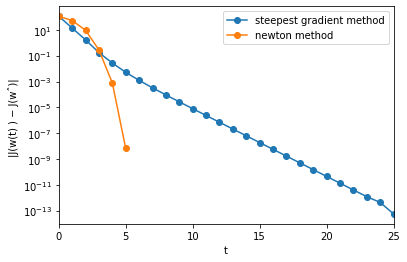

In [42]:
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('|J(w(t) ) − J(wˆ)| ')

tmp1 = arr_sgm[len(arr_sgm)-1]
arr_sgm -= tmp1*np.ones((len(arr_sgm)))
arr_sgm = np.delete(arr_sgm,len(arr_sgm)-1)
plt.plot(np.arange(0, len(arr_sgm), 1), arr_sgm,marker="o",label="steepest gradient method")

tmp2 = arr_newton[len(arr_newton)-1]
arr_newton -= tmp2*np.ones((len(arr_newton)))
arr_newton = np.delete(arr_newton,len(arr_newton)-1)
plt.plot(np.arange(0, len(arr_newton), 1), arr_newton,marker="o",label="newton method")
plt.xlim(0, 25)
plt.legend()